## Kaggle URL

* https://www.kaggle.com/competitions/titanic


## 필요한 라이브러리 로드

In [1]:
# 데이터 분석을 위한 pandas, 수치계산을 위한 numpy
# 시각화를 위한 seaborn, matplotlib.pyplot 을 로드합니다. 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 데이터셋 로드

In [2]:
# train
train = pd.read_csv('data/titanic/train.csv')
print('train.shape :',train.shape)
train.head()

train.shape : (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# test
test = pd.read_csv('data/titanic/test.csv')
print('test.shape :',test.shape)
test.head()

test.shape : (418, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## info

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## histogram

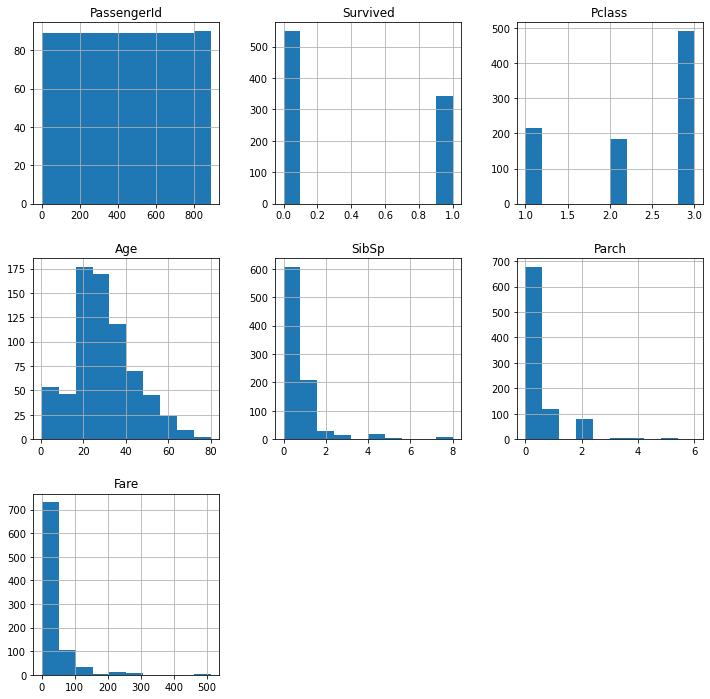

In [5]:
train.hist(figsize=(12,12))
plt.show()

## 파생변수 만들기

### 가족의 수
* 가족의 수 == Parch + SibSp + 1(나)

In [6]:
train['Familysize'] = train['SibSp'] + train['Parch'] + 1
train.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Familysize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S,2


In [7]:
test['Familysize'] = test['SibSp'] + test['Parch'] + 1
test.head(1)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Familysize
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1


### 성별

In [8]:
train['Sex_encode'] = (train['Sex'] == 'female')
test['Sex_encode'] = (test['Sex'] == 'female')
display(train.head(1))
display(test.head(1))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Familysize,Sex_encode
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S,2,False


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Familysize,Sex_encode
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1,False


### 호칭

In [9]:
train['Title'] = train['Name'].map(lambda x : x.split(',')[1].split('.')[0].strip())
test['Title'] = test['Name'].map(lambda x : x.split(',')[1].split('.')[0].strip())
display(train.head(1))
test.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Familysize,Sex_encode,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S,2,False,Mr


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Familysize,Sex_encode,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1,False,Mr


### Cabin

In [29]:
train['Cabin_initial'] = train['Cabin'].str[0]
test['Cabin_initial'] = test['Cabin'].str[0]
display(train.head(1))
test.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Familysize,Sex_encode,Title,Cabin_initial,Embarked_S,Embarked_C,Embarked_Q
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S,2,False,Mr,NaN,True,False,False


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Familysize,Sex_encode,Title,Cabin_initial
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1,False,Mr,NaN


### Title

In [40]:
title_other = train['Title'].value_counts().head().index
title_other

Index(['Mr', 'Miss', 'Mrs', 'Master', 'Dr'], dtype='object')

In [68]:
train['Title_other'] = train['Title']
test['Title_other'] = test['Title']

train.loc[~train['Title'].isin(title_other), 'Title_other'] = 'Other'
train['Title_other'].value_counts()

Mr        517
Miss      182
Mrs       125
Master     40
Other      20
Dr          7
Name: Title_other, dtype: int64

In [69]:
test.loc[~test['Title'].isin(title_other), 'Title_other'] = 'Other'
test['Title_other'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Other       6
Dr          1
Name: Title_other, dtype: int64

## One-Hot-Encoding

* pandas에서는 Ordinal-Encoding을 category 타입에 대해서 cat 속성의 codes 속성으로 지원하고 있습니다.
* pandas에서는 One-Hot-Encoding을 get_dummies 메서드로 지원하고 있습니다.
* sklearn에서는 Ordinal-Encoding을 OrdinalEncoder 객체로 지원하고 있습니다.
* sklearn에서는 One-Hot-Encoding을 OneHotEncoder 객체로 지원하고 있습니다.

In [11]:
train['Embarked_S'] = train['Embarked'] == 'S'
train['Embarked_C'] = train['Embarked'] == 'C'
train['Embarked_Q'] = train['Embarked'] == 'Q'

train[['Embarked','Embarked_S','Embarked_C','Embarked_Q']].head()

,Embarked,Embarked_S,Embarked_C,Embarked_Q
0,S,True,False,False
1,C,False,True,False
2,S,True,False,False
3,S,True,False,False
4,S,True,False,False


In [12]:
train['Embarked'].astype('category').cat.codes

0      2
1      0
2      2
3      2
4      2
      ..
886    2
887    2
888    2
889    0
890    1
Length: 891, dtype: int8

In [13]:
pd.get_dummies(train['Embarked']).head()

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


## 결측치 대체

In [14]:
train.isna().sum().sort_values(ascending=False)[:5]

Cabin            687
Cabin_initial    687
Age              177
Embarked           2
PassengerId        0
dtype: int64

In [15]:
test.isna().sum().sort_values(ascending=False)[:5]

Cabin            327
Cabin_initial    327
Age               86
Fare               1
PassengerId        0
dtype: int64

In [16]:
train['Age'].fillna(train['Age'].mean(),inplace=True)
test['Age'].fillna(test['Age'].mean(),inplace=True)
test['Fare'].fillna(test['Fare'].mean(),inplace=True)

## 학습과 예측 전체 과정

* feature_names : 학습(훈련), 예측에 사용할 컬럼을 리스트 형태로 만들어서 변수에 담아줍니다.
* label_name : 정답값

* X_train : feature_names 에 해당되는 컬럼만 train에서 가져옵니다.
    * 학습(훈련)에 사용할 데이터셋 예) 시험의 기출문제

* X_test : feature_names 에 해당되는 컬럼만 test에서 가져옵니다.
    * 예측에 사용할 데이터셋 예) 실전 시험문제

* y_train : label_name 에 해당 되는 컬럼만 train에서 가져옵니다.
    * 학습(훈련)에 사용할 정답 값 예) 기출문제의 정답

* model : 학습, 예측에 사용할 머신러닝 알고리즘

* model.fit(X_train, y_train) : 학습(훈련), 기출문제와 정답을 가지고 학습(훈련)하는 과정과 유사합니다.

* model.predict(X_test) :  예측, 실제 시험을 보는 과정과 유사합니다. => 문제를 풀어서 정답을 구합니다.

* score
    * 시험을 봤다면 몇 문제를 맞고 틀렸는지 채점해 봅니다.
* metric
    * 점수를 채점하는 공식입니다. (예를 들어 학교에서 중간고사를 봤다면 전체 평균을 계산해 줍니다.)


## 정답값이자 예측해야 될 값

In [25]:
# label_name 이라는 변수에 예측할 컬럼의 이름을 담습니다.
label_name = 'Survived'
label_name

'Survived'

## 학습, 예측에 사용할 컬럼

In [64]:
# feature_names 라는 변수에 학습과 예측에 사용할 컬럼명을 가져옵니다.
feature_names = ['Pclass','Age','Fare','Embarked','Familysize','Sex_encode','Title_other']

## 학습, 예측 데이터셋 만들기


<img src="https://i.imgur.com/yvBtRtJ.png" width="600">

* X_train : feature_names 에 해당되는 컬럼만 train에서 가져옵니다.
    * 학습(훈련)에 사용할 데이터셋 예) 시험의 기출문제

* X_test : feature_names 에 해당되는 컬럼만 test에서 가져옵니다.
    * 예측에 사용할 데이터셋 예) 실전 시험문제

* y_train : label_name 에 해당 되는 컬럼만 train에서 가져옵니다.
    * 학습(훈련)에 사용할 정답 값 예) 기출문제의 정답

In [65]:
# X_train : feature_names 에 해당되는 컬럼만 train에서 가져옵니다.
# 학습(훈련)에 사용할 데이터셋 예) 시험의 기출문제

X_train = pd.get_dummies(train[feature_names])
print(X_train.shape)
X_train.columns

(891, 14)


Index(['Pclass', 'Age', 'Fare', 'Familysize', 'Sex_encode', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Title_other_Dr', 'Title_other_Master',
       'Title_other_Miss', 'Title_other_Mr', 'Title_other_Mrs',
       'Title_other_Other'],
      dtype='object')

In [70]:
# X_test : feature_names 에 해당되는 컬럼만 test에서 가져옵니다.
# 예측에 사용할 데이터셋 예) 실전 시험문제

X_test = pd.get_dummies(test[feature_names])
print(X_test.shape)
X_test.columns

(418, 14)


Index(['Pclass', 'Age', 'Fare', 'Familysize', 'Sex_encode', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Title_other_Dr', 'Title_other_Master',
       'Title_other_Miss', 'Title_other_Mr', 'Title_other_Mrs',
       'Title_other_Other'],
      dtype='object')

In [74]:
# y_train : label_name 에 해당 되는 컬럼만 train에서 가져옵니다.
# 학습(훈련)에 사용할 정답 값 예) 기출문제의 정답

y_train = train[label_name]
y_train[:4]

0    0
1    1
2    1
3    1
Name: Survived, dtype: int64

## 머신러닝 알고리즘 가져오기
* [결정 트리 학습법 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EA%B2%B0%EC%A0%95_%ED%8A%B8%EB%A6%AC_%ED%95%99%EC%8A%B5%EB%B2%95)


* 결과를 해석하고 이해하기 쉽다.간략한 설명만으로 결정 트리를 이해하는 것이 가능하다.
* 자료를 가공할 필요가 거의 없다.다른 기법들의 경우 자료를 정규화하거나 임의의 변수를 생성하거나 값이 없는 변수를 제거해야 하는 경우가 있다.
* 수치 자료와 범주 자료 모두에 적용할 수 있다.다른 기법들은 일반적으로 오직 한 종류의 변수를 갖는 데이터 셋을 분석하는 것에 특화되어 있다. (일례로 신경망 학습은 숫자로 표현된 변수만을 다룰 수 있는 것에 반해 관계식(relation rules)은 오직 명목 변수만을 다룰 수 있다.
* 화이트박스 모델을 사용한다. 모델에서 주어진 상황이 관측 가능하다면 불 논리를 이용하여 조건에 대해 쉽게 설명할 수 있다. (결과에 대한 설명을 이해하기 어렵기 때문에 인공신경망은 대표적인 블랙 박스 모델이다.)
* 안정적이다. 해당 모델 추리의 기반이 되는 명제가 다소 손상되었더라도 잘 동작한다.
* 대규모의 데이터 셋에서도 잘 동작한다. 방대한 분량의 데이터를 일반적인 컴퓨터 환경에서 합리적인 시간 안에 분석할 수 있다.


```python
DecisionTreeClassifier(
    *,
    criterion='gini', # 분할방법 {"gini", "entropy"}, default="gini"
    splitter='best',
    max_depth=None, # The maximum depth of the tree
    min_samples_split=2, # The minimum number of samples required to split an internal node
    min_samples_leaf=1, # The minimum number of samples required to be at a leaf node.
    min_weight_fraction_leaf=0.0, # The minimum weighted fraction of the sum total of weights
    max_features=None, # The number of features to consider when looking for the best split
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    class_weight=None,
    ccp_alpha=0.0,
)
```

* 주요 파라미터
    * criterion: 가지의 분할의 품질을 측정하는 기능입니다.
    * max_depth: 트리의 최대 깊이입니다.
    * min_samples_split:내부 노드를 분할하는 데 필요한 최소 샘플 수입니다.
    * min_samples_leaf: 리프 노드에 있어야 하는 최소 샘플 수입니다.
    * max_leaf_nodes: 리프 노드 숫자의 제한치입니다.
    * random_state: 추정기의 무작위성을 제어합니다. 실행했을 때 같은 결과가 나오도록 합니다.

In [84]:
# max_depth == 1 트리의 깊이를 의미합니다.
# max_features == 0.9 라면 전체 피처의 90% 만 사용합니다.
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

model = DecisionTreeClassifier()

param_grid = {
    'max_depth':[3,4,5,6,7,8,9,10],
    'min_samples_leaf':[5,10,20,30,40],
    'max_features':[0.5,0.6,0.7,0.8,0.9]
}

grid_cv = GridSearchCV(model, refit=True, param_grid = param_grid, cv=3)
grid_cv.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': [0.5, 0.6, 0.7, 0.8, 0.9],
                         'min_samples_leaf': [5, 10, 20, 30, 40]})

In [85]:
print(grid_cv.best_params_)
print(grid_cv.best_score_)

{'max_depth': 6, 'max_features': 0.5, 'min_samples_leaf': 5}
0.8260381593714926


In [87]:
best = grid_cv.best_estimator_

## cross validate

* cross_validate : Evaluate metric(s) by cross-validation and also record fit/score times.
* cross_val_score : Evaluate a score by cross-validation.
* cross_val_predict : Generate cross-validated estimates for each input data point.

## 정확도(Accuracy) 측정하기

* 모델이 얼마나 잘 예측했는지 측정해 봅니다.
* 시험을 보고 나서 몇 개 맞았는지 틀렸는지 채점해 보는 과정과 유사하다고 보면 됩니다.
* 실전 문제에서는 답이 없어서 우리가 예측을 해야겠지만 이 실습은 정답이 있는 모의고사 입니다. 
* 모의고사를 보면 내 실력이 어느정도 되는지 예측해 보는 것처럼 점수를 측정해 봅니다.

In [88]:
from sklearn.metrics import accuracy_score
y_pred = best.predict(X_test)

accuracy_score(y_test,y_pred)

NameError: name 'y_test' is not defined

## 학습(훈련)
* 시험을 볼 때 기출문제(X_train)와 정답(y_train)을 보고 공부하는 과정과 유사합니다.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


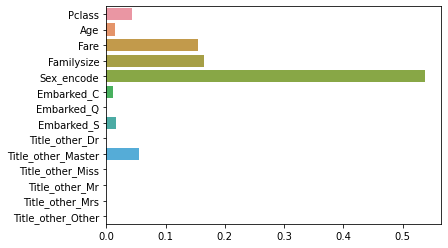

In [99]:
# 피처의 중요도 시각화 하기
imp = best.feature_importances_
imp_ser = pd.Series(imp, X_train.columns)
sns.barplot(imp_ser.values,imp_ser.index)
plt.show()

## 예측
* 실전 시험문제(X_test)라고 보면 됩니다. 우리가 정답을 직접 예측합니다.

In [89]:
y_pred = best.predict(X_test)

## 캐글에 제출하기

In [90]:
df_submit = pd.read_csv('data/titanic/gender_submission.csv')
print('df_submit.shape',df_submit.shape)
df_submit.head()

df_submit.shape (418, 2)


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [92]:
df_submit['Survived'] = best.predict(X_test)
print(df_submit['Survived'].value_counts())
print('df_submit.shape',df_submit.shape)
df_submit.to_csv('Submit2.csv',index=False)
df_submit.head()

0    257
1    161
Name: Survived, dtype: int64
df_submit.shape (418, 2)


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
